In [2]:
import networkx as nx

In [21]:
G = nx.complete_graph(5)
K5 = nx.convert_node_labels_to_integers(G, first_label=2)
G.add_edges_from(K5.edges())
c = list(nx.community.k_clique_communities(G, 2))
print(sorted(list(c[0])))
list(nx.community.k_clique_communities(G, 5))

[0, 1, 2, 3, 4, 5, 6]


[frozenset({0, 1, 2, 3, 4}), frozenset({2, 3, 4, 5, 6})]

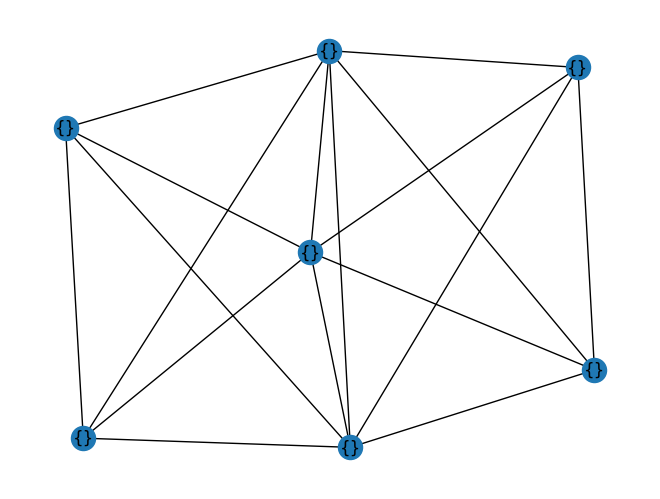

In [26]:
nx.draw(G, labels=G.nodes())

Número de nodos: 11
Número de aristas: 22

Comunidades de 4-clique encontradas:
Comunidad 1: [0, 1, 2, 3, 4]
Comunidad 2: [6, 7, 8, 9, 10]


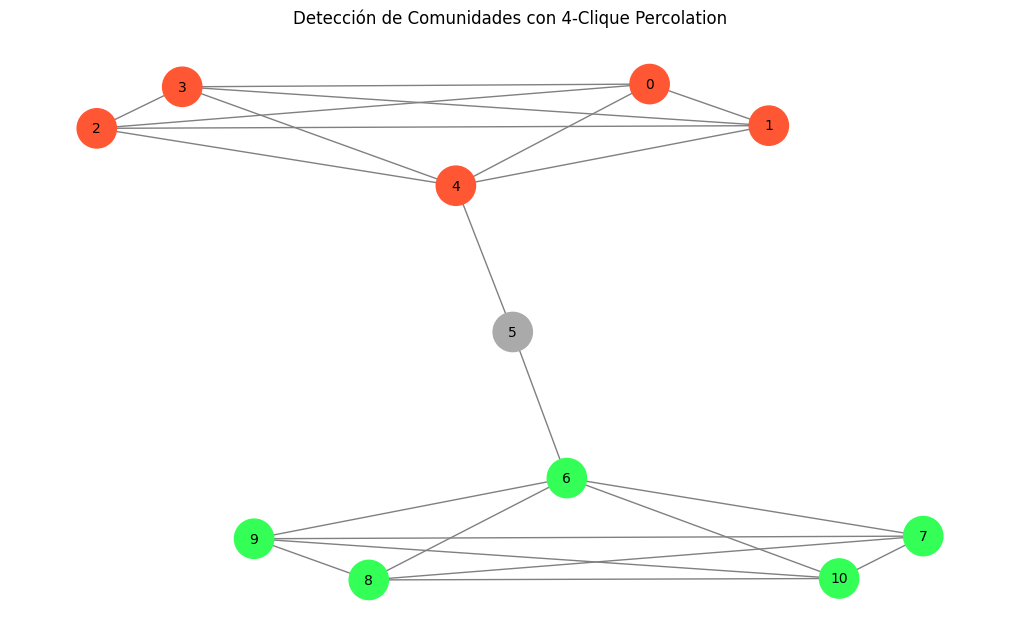

In [37]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt

# 1. Crear un Grafo de Ejemplo
# Un grafo de mancuerna (Barbell Graph) de 5 nodos en cada extremo y 1 nodo de conexión.
# Esto crea dos grupos densos conectados por un "puente" delgado.
G = nx.barbell_graph(m1=5, m2=1) 
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

# 2. Definir 'k' y Encontrar Comunidades
# Buscaremos comunidades basadas en 4-cliques (k=4). 
# Un 4-clique es un subgrafo completo de 4 nodos.
k = 4
communities_generator = k_clique_communities(G, k=k)

# Convertir el generador a una lista para inspeccionar los resultados
communities = list(communities_generator)

# 3. Mostrar las Comunidades Encontradas
print(f"\nComunidades de {k}-clique encontradas:")
for i, community in enumerate(communities):
    print(f"Comunidad {i+1}: {sorted(list(community))}")

# 4. (Opcional) Visualización
# Asignamos un color diferente a cada comunidad
node_colors = {}
color_map = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF6'] # Definir algunos colores

for i, community in enumerate(communities):
    color = color_map[i % len(color_map)]
    for node in community:
        # Esto maneja las comunidades superpuestas (los nodos pueden tener el color de la última comunidad que los contiene)
        node_colors[node] = color 

# Colores por defecto para nodos que no están en ninguna comunidad k-clique
default_color = '#AAAAAA'
colors = [node_colors.get(node, default_color) for node in G.nodes()]

# Dibujar el grafo 
pos = nx.spring_layout(G, seed=42) # Usar un layout consistente
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, 
    with_labels=True, 
    node_color=colors, 
    node_size=800, 
    font_size=10, 
    font_color='black',
    edge_color='gray'
)
plt.title(f"Detección de Comunidades con {k}-Clique Percolation")
plt.show()